In [1]:
#notebook to compare our autoencoder clustering to our kmeans clustering

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('demo_style.mplstyle')

In [2]:
#get job info

import os

os.environ["SLURM_JOB_ID"]


'671419'

In [3]:
#gpu sanity checks

tf.test.is_built_with_cuda()



True

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#load our kmeans labels

q003_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q003_kmeans_labels_nocurrent.npy')
q103_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q103_kmeans_labels_nocurrent.npy')

In [6]:
#load our data

q003_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_data.npy')
q103_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_data.npy') 

qall_data = np.concatenate((q003_data, q103_data), axis=0)

In [7]:
#load our encoded and pca data

encoded_all = np.load('encoded_all.npy')
img_pca = np.load('img_pca.npy')

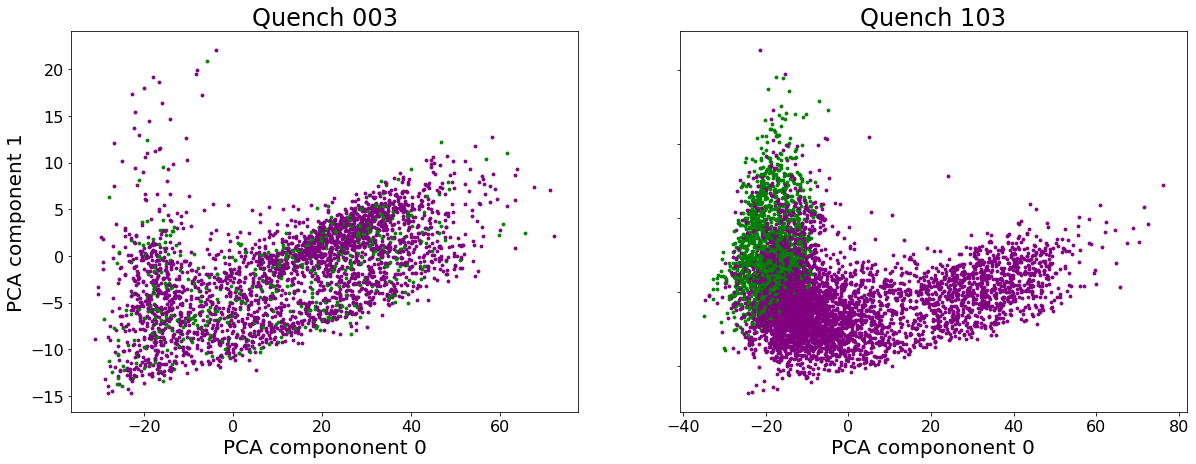

In [8]:
qall_labels = np.concatenate((q003_labels, q103_labels), axis=0)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['purple','green']
color_label=[]
for label in qall_labels:
    if label == 0:
        color_label.append(color_key[0])
    else:
        color_label.append(color_key[1])

msize = 8

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(qall_data.shape[0]):
    if i <= q003_data.shape[0]:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

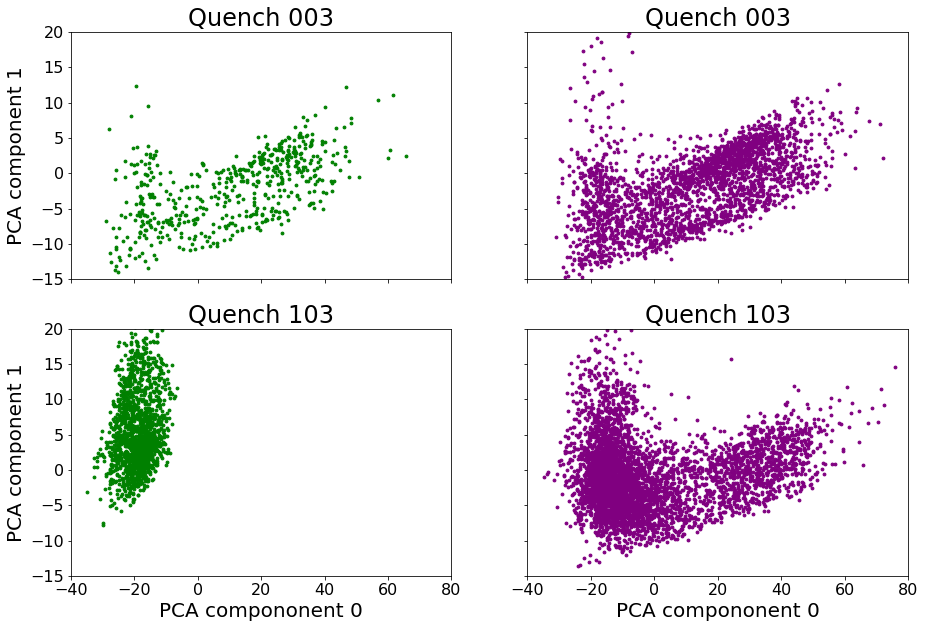

In [19]:
#make additoinal figure plotting green and purple separately

#make the same plot but show all quenches separately

msize = 8
xlimits = (-40,80)
ylimits = (-15,20)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        axs[0, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 0].set_title('Quench 003')
        axs[0, 0].set_xlim(xlimits)
        axs[0, 0].set_ylim(ylimits)
    elif (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[0, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 1].set_title('Quench 003')
        axs[0, 1].set_xlim(xlimits)
        axs[0, 1].set_ylim(ylimits)
    elif (i > q003_data.shape[0]) and (color_label[i]=='green'):
        axs[1, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 0].set_title('Quench 103')
        axs[1, 0].set_xlim(xlimits)
        axs[1, 0].set_ylim(ylimits)        
    elif (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[1, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 1].set_title('Quench 103')
        axs[1, 1].set_xlim(xlimits)
        axs[1, 1].set_ylim(ylimits)        

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [25]:
#select and plot some spectrograms (3) from each region and with each label

#divide the PCA space into 3 regions-- left v, center v, right v

pad=5
num_images = 3

#left v
lx=-20
ly=5
leftvxmin = lx-pad 
leftvxmax = lx+pad
leftvymin = ly-pad 
leftvymax = ly+pad

#center v
cx=-10
cy=-5
centervxmin = cx-pad 
centervxmax = cx+pad
centervymin = cy-pad 
centervymax = cy+pad

#right v
rx=20
ry=0
rightvxmin = rx-pad 
rightvxmax = rx+pad
rightvymin = ry-pad 
rightvymax = ry+pad



q003_green_left
[123, 243, 294, 354, 614, 996, 1323, 1401, 1468, 1568, 1642, 1686, 2694, 2741, 2882, 3012, 3057, 3058]
These are the random images we chose to display:
[1686 1568 1568]


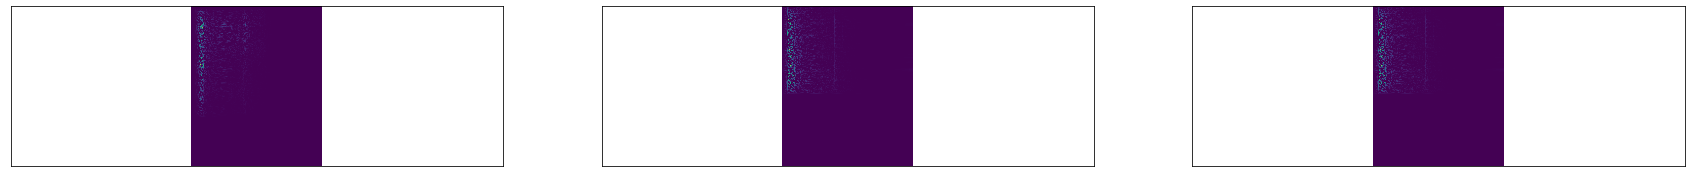

In [29]:
#quench 3, green, left

q003_green_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q003_green_left.append(i)
        
print("q003_green_left")        
print(q003_green_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()

q003_green_center
[67, 181, 264, 266, 321, 334, 572, 627, 651, 819, 910, 912, 1002, 1049, 1278, 1412, 1497, 1609, 1628, 1670, 1675, 1818, 1852, 1881, 1889, 1950, 1989, 1993, 2073, 2108, 2158, 2198, 2231, 2506, 2564, 2596, 2613, 2617, 2641, 2644, 2700, 2749, 2809, 3038, 3040, 3049, 3055, 3073, 3087]
These are the random images we chose to display:
[1002 1675 2613]


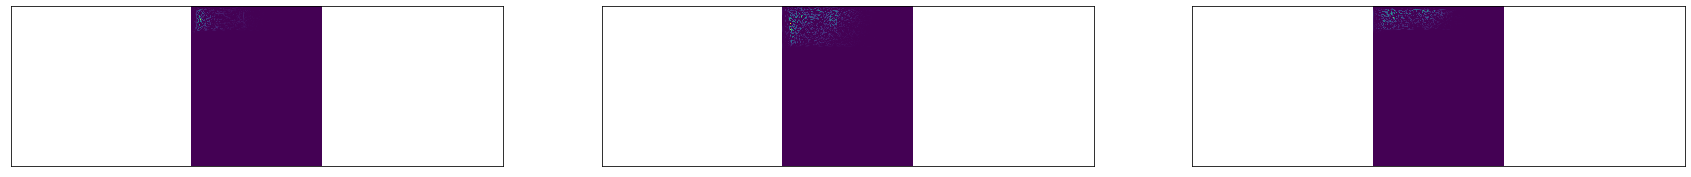

In [30]:
#quench 3, green, center

q003_green_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q003_green_center.append(i)
        
print("q003_green_center")        
print(q003_green_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()


q003_green_right
[245, 277, 326, 571, 613, 625, 723, 724, 817, 837, 845, 882, 1028, 1061, 1064, 1080, 1156, 1172, 1229, 1247, 1331, 1432, 1435, 1491, 1499, 1518, 1572, 1647, 1650, 1656, 1731, 1770, 1771, 1813, 1839, 1877, 1894, 1914, 1977, 1988, 2011, 2081, 2118, 2208, 2209, 2237, 2308, 2363, 2428, 2482, 2491, 2497, 2512, 2554, 2620, 2642, 2665, 2696, 2717, 2763, 2800, 2811, 2813, 2843, 2909, 2918, 2941, 2946, 2956, 3039, 3052, 3054, 3061, 3115]
These are the random images we chose to display:
[1647 3061 1156]


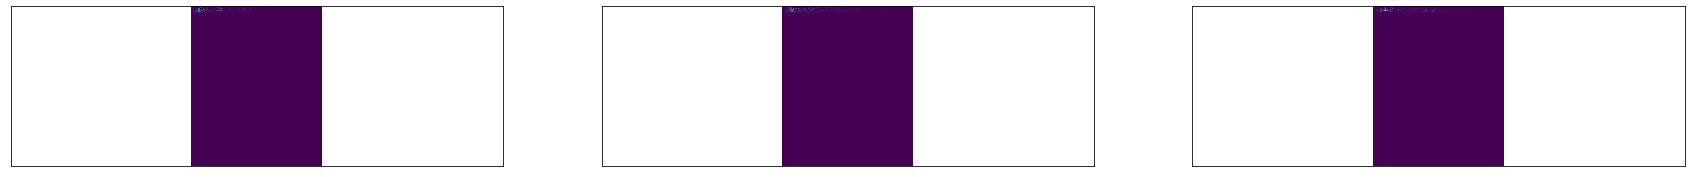

In [31]:
#quench 3, green, right

q003_green_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q003_green_right.append(i)
        
print("q003_green_right")        
print(q003_green_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()

q003_purple_left
[148, 185, 301, 310, 352, 364, 365, 419, 424, 479, 493, 503, 607, 642, 663, 737, 879, 1001, 1096, 1270, 1336, 1344, 1410, 1452, 1471, 1494, 1550, 1562, 1637, 1657, 1798, 1819, 1910, 1984, 1991, 2045, 2048, 2052, 2210, 2228, 2230, 2249, 2358, 2362, 2459, 2479, 2485, 2499, 2753, 2768, 2877, 2894, 3139, 3143, 3144]
These are the random images we chose to display:
[2048 2228 1819]


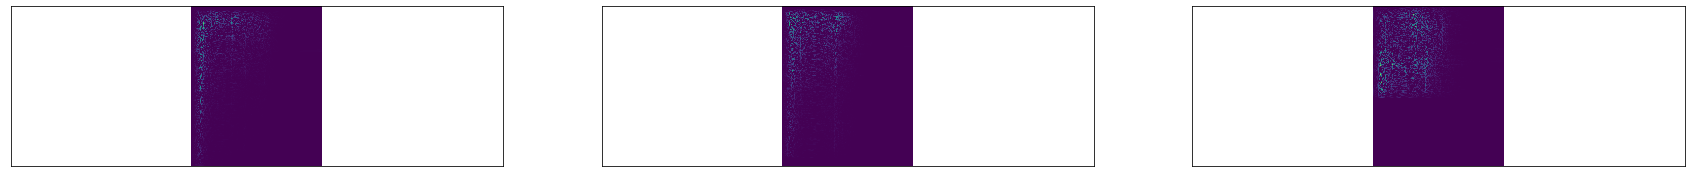

In [34]:
#quench 3, purple, left

q003_purple_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q003_purple_left.append(i)
        
print("q003_purple_left")        
print(q003_purple_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()


q003_purple_center
[15, 20, 25, 27, 80, 89, 93, 103, 121, 126, 146, 150, 175, 183, 194, 202, 205, 211, 224, 231, 253, 254, 255, 258, 270, 283, 288, 300, 335, 341, 345, 356, 366, 373, 384, 386, 392, 410, 430, 473, 477, 481, 483, 507, 535, 550, 557, 573, 593, 624, 646, 647, 680, 686, 692, 703, 704, 706, 709, 716, 749, 788, 795, 796, 797, 805, 820, 830, 831, 856, 898, 915, 926, 940, 942, 948, 979, 981, 985, 988, 1004, 1007, 1010, 1022, 1034, 1074, 1085, 1087, 1093, 1135, 1164, 1174, 1190, 1204, 1226, 1228, 1239, 1242, 1243, 1300, 1311, 1327, 1333, 1338, 1354, 1358, 1366, 1373, 1378, 1382, 1407, 1409, 1428, 1454, 1465, 1466, 1469, 1472, 1500, 1503, 1522, 1545, 1573, 1604, 1607, 1621, 1624, 1643, 1655, 1659, 1661, 1676, 1691, 1705, 1711, 1713, 1729, 1750, 1752, 1753, 1766, 1788, 1803, 1821, 1844, 1855, 1868, 1872, 1896, 1898, 1901, 1944, 1956, 1969, 2005, 2039, 2051, 2105, 2107, 2143, 2180, 2191, 2235, 2292, 2315, 2323, 2335, 2354, 2357, 2360, 2376, 2377, 2449, 2486, 2492, 2532, 2556, 2562,

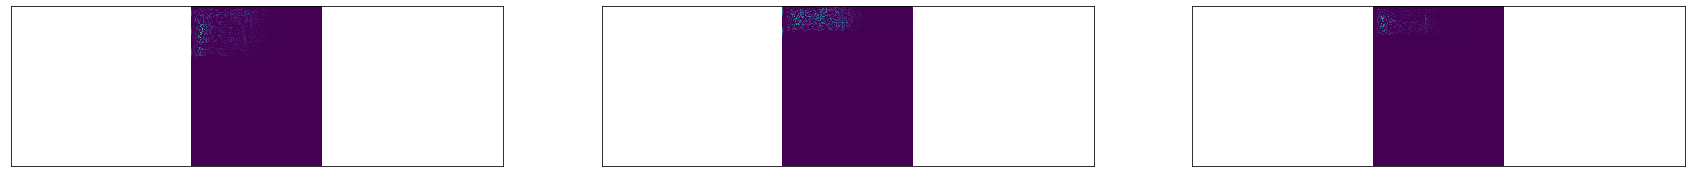

In [36]:
#quench 3, purple, center

q003_purple_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q003_purple_center.append(i)
        
print("q003_purple_center")        
print(q003_purple_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()

q003_purple_right
[0, 6, 10, 17, 22, 23, 30, 40, 44, 56, 69, 75, 106, 110, 119, 141, 159, 160, 172, 174, 198, 221, 227, 238, 242, 250, 269, 271, 272, 273, 278, 279, 284, 295, 299, 304, 314, 325, 328, 339, 349, 350, 355, 358, 372, 389, 390, 391, 401, 403, 407, 408, 415, 425, 426, 440, 451, 456, 460, 463, 465, 467, 471, 498, 500, 505, 509, 520, 524, 540, 553, 564, 568, 575, 595, 599, 616, 629, 631, 633, 639, 645, 665, 666, 670, 673, 681, 683, 684, 685, 688, 690, 705, 711, 713, 715, 718, 720, 728, 730, 733, 760, 764, 766, 778, 792, 812, 823, 828, 844, 846, 857, 859, 860, 861, 878, 884, 916, 921, 934, 946, 955, 982, 997, 1000, 1013, 1041, 1042, 1044, 1050, 1052, 1058, 1065, 1067, 1072, 1079, 1090, 1095, 1102, 1111, 1119, 1121, 1130, 1133, 1151, 1153, 1154, 1166, 1179, 1191, 1192, 1193, 1194, 1213, 1234, 1241, 1250, 1253, 1254, 1262, 1264, 1291, 1299, 1340, 1342, 1360, 1365, 1369, 1384, 1389, 1392, 1403, 1408, 1421, 1425, 1434, 1440, 1446, 1458, 1486, 1488, 1492, 1502, 1523, 1528, 1529, 153

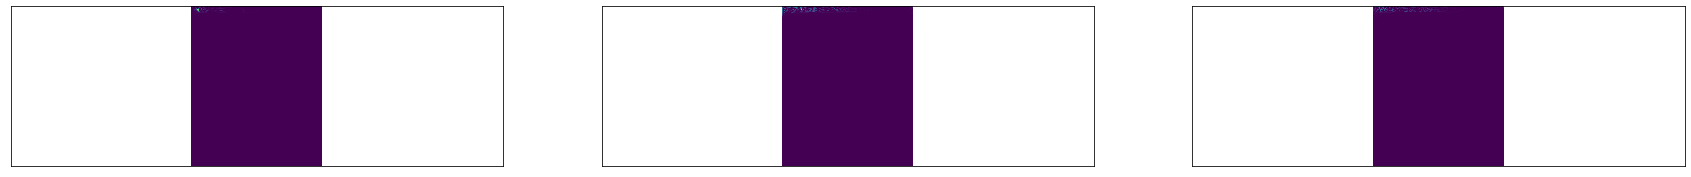

In [38]:
#quench 3, purple, right

q003_purple_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q003_purple_right.append(i)
        
print("q003_purple_right")        
print(q003_purple_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()


q103_green_left
[3204, 3272, 3311, 3321, 3338, 3352, 3365, 3377, 3393, 3949, 4015, 4033, 4059, 4081, 4088, 4117, 4152, 4256, 4262, 4264, 4290, 4292, 4309, 4316, 4327, 4354, 4363, 4369, 4377, 4391, 4409, 4414, 4425, 4429, 4437, 4440, 4455, 4487, 4514, 4531, 4544, 4562, 4572, 4576, 4633, 4640, 4654, 4672, 4673, 4674, 4688, 4700, 4723, 4725, 4730, 4749, 4756, 4772, 4774, 4778, 4801, 4822, 4834, 4839, 4841, 4850, 4859, 4863, 4882, 4888, 4895, 4902, 4905, 4927, 4934, 4939, 4943, 4947, 4959, 4984, 4988, 5004, 5035, 5038, 5078, 5082, 5090, 5096, 5108, 5116, 5142, 5145, 5151, 5154, 5156, 5168, 5181, 5185, 5196, 5197, 5199, 5208, 5225, 5236, 5248, 5254, 5263, 5274, 5285, 5303, 5313, 5317, 5320, 5329, 5333, 5347, 5355, 5360, 5380, 5392, 5398, 5406, 5407, 5412, 5417, 5425, 5439, 5440, 5461, 5468, 5470, 5474, 5476, 5492, 5503, 5507, 5518, 5519, 5528, 5536, 5542, 5546, 5550, 5555, 5563, 5566, 5567, 5569, 5577, 5582, 5591, 5605, 5616, 5620, 5626, 5630, 5634, 5642, 5644, 5651, 5653, 5658, 5668, 5672,

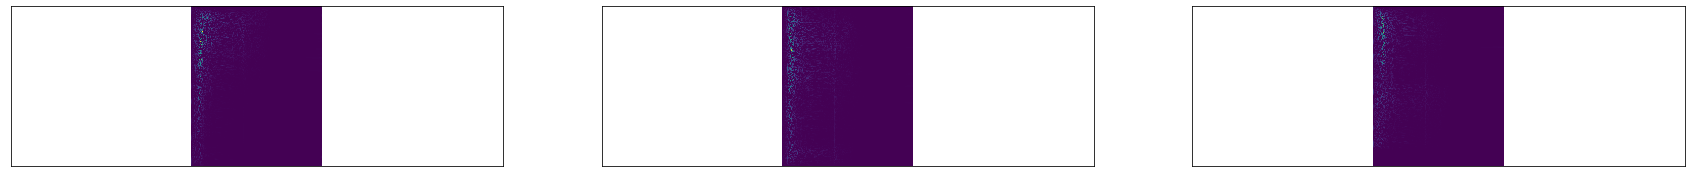

In [40]:
#quench 103, green, left

q103_green_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q103_green_left.append(i)
        
print("q103_green_left")        
print(q103_green_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_green_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()

In [ ]:
#quench 103, green, center

#none


In [ ]:
#quench 103, green, right

#none


q103_purple_left
[3168, 3200, 3207, 3257, 3276, 3277, 3316, 3358, 3361, 3384, 3429, 3507, 3683, 3686, 3721, 3745, 3793, 3803, 3818, 3826, 3848, 3866, 3873, 3915, 3917, 3918, 3921, 3956, 3958, 3959, 3981, 3984, 3986, 4012, 4029, 4034, 4041, 4054, 4075, 4077, 4083, 4100, 4104, 4116, 4119, 4128, 4130, 4139, 4147, 4161, 4208, 4214, 4217, 4227, 4235, 4237, 4249, 4266, 4278, 4294, 4297, 4304, 4318, 4331, 4338, 4339, 4342, 4353, 4358, 4372, 4379, 4397, 4405, 4410, 4479, 4494, 4506, 4513, 4515, 4534, 4535, 4542, 4581, 4600, 4607, 4617, 4622, 4643, 4646, 4649, 4652, 4662, 4671, 4682, 4693, 4695, 4697, 4704, 4719, 4731, 4734, 4742, 4746, 4747, 4758, 4759, 4817, 4864, 4867, 4879, 4897, 4961, 4968, 4978, 4979, 4985, 4997, 5028, 5040, 5044, 5060, 5072, 5077, 5093, 5095, 5102, 5122, 5127, 5161, 5171, 5182, 5218, 5220, 5241, 5245, 5247, 5253, 5255, 5264, 5279, 5291, 5300, 5306, 5312, 5328, 5331, 5339, 5357, 5426, 5463, 5471, 5496, 5514, 5527, 5532, 5537, 5541, 5559, 5580, 5583, 5587, 5599, 5645, 5652

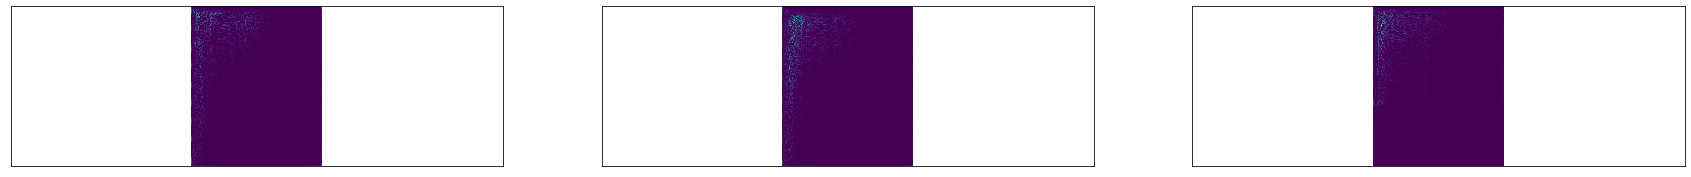

In [41]:
#quench 103, purple, left

q103_purple_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q103_purple_left.append(i)
        
print("q103_purple_left")        
print(q103_purple_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()

q103_purple_center
[6637, 6641, 6647, 6648, 6652, 6655, 6664, 6698, 6700, 6702, 6703, 6718, 6728, 6729, 6731, 6748, 6753, 6774, 6803, 6806, 6818, 6823, 6826, 6831, 6837, 6839, 6847, 6885, 6888, 6891, 6905, 6921, 6942, 6974, 6981, 6993, 6996, 7009, 7016, 7022, 7028, 7036, 7053, 7062, 7075, 7099, 7116, 7120, 7133, 7142, 7143, 7169, 7221, 7231, 7241, 7256, 7257, 7278, 7280, 7304, 7326, 7331, 7345, 7348, 7360, 7369, 7400, 7419, 7420, 7427, 7429, 7434, 7445, 7446, 7447, 7451, 7455, 7456, 7457, 7459, 7461, 7462, 7465, 7472, 7474, 7477, 7482, 7500, 7501, 7511, 7516, 7519, 7522, 7526, 7533, 7536, 7539, 7543, 7548, 7552, 7556, 7560, 7563, 7575, 7586, 7596, 7599, 7605, 7607, 7610, 7626, 7630, 7633, 7641, 7643, 7646, 7658, 7665, 7671, 7673, 7679, 7681, 7683, 7692, 7695, 7700, 7705, 7718, 7720, 7722, 7723, 7726, 7731, 7735, 7740, 7741, 7749, 7752, 7767, 7768, 7769, 7770, 7783, 7789, 7792, 7796, 7800, 7803, 7820, 7823, 7831, 7833, 7834, 7837, 7845, 7849, 7855, 7857, 7872, 7878, 7885, 7889, 7892, 78

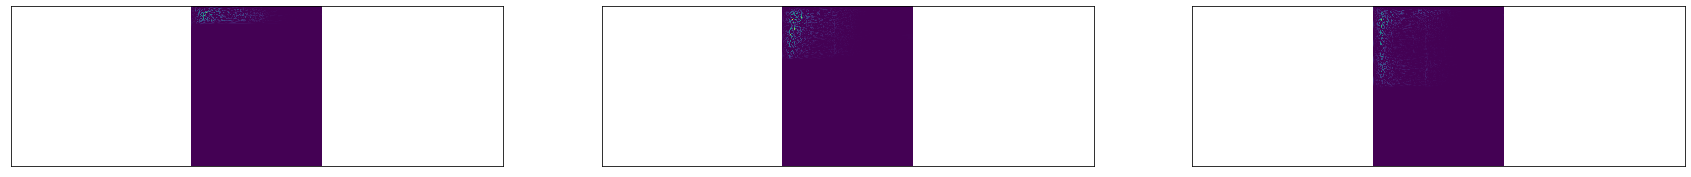

In [42]:
#quench 103, purple, center

q103_purple_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q103_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q103_purple_center.append(i)
        
print("q103_purple_center")        
print(q103_purple_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()


q103_purple_right
[6668, 6692, 6697, 6707, 6720, 6744, 6902, 6969, 6972, 7115, 7201, 7228, 7293, 7330, 7394, 7416, 7422, 7438, 7441, 7442, 7496, 7503, 7506, 7518, 7521, 7534, 7584, 7611, 7736, 7744, 7774, 7785, 7867, 7916, 7935, 7939, 7960, 8042, 8065, 8102, 8187, 8219, 8269, 8422, 8453, 8470, 8514, 8542, 8553, 8558, 8598, 8711, 8726, 8740, 8779, 8813, 8829, 8873, 8884, 8902, 8913, 9006, 9065, 9089, 9172, 9245, 9268, 9320, 9338, 9349, 9406, 9453, 9524, 9553, 9555, 9598, 9605, 9627, 9639, 9663, 9714, 9721]
These are the random images we chose to display:
[7496 9598 8829]


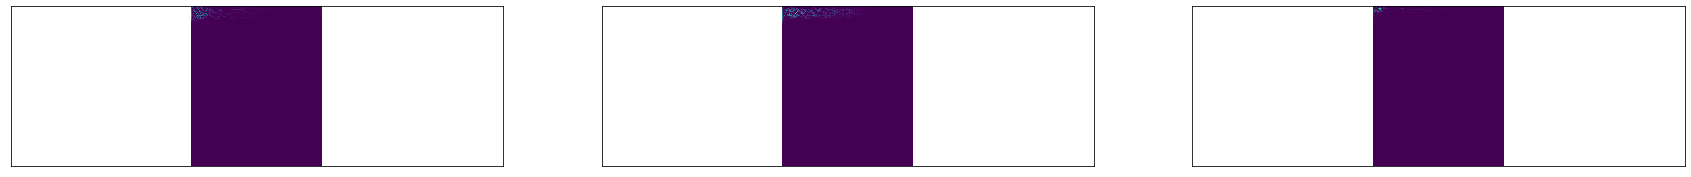

In [43]:
#quench 103, purple, right

q103_purple_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q103_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q103_purple_right.append(i)
        
print("q103_purple_right")        
print(q103_purple_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

for i, image_idx in enumerate(show_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(image_idx)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('equal')
    
plt.show()
